In [21]:
import numpy as np
import pandas as pd

import os

In [22]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [23]:
data = pd.read_csv(r'C:\Users\Chi\Desktop\satellite\C\vn-steel-jsc-stock-prediction\data\data-aggregated.csv')
data.head()

,date,open,high,low,close,volume,symbol
0,1/4/2010,60.0,61.0,60.0,61.0,653120,HPG
1,1/5/2010,64.0,64.0,61.0,64.0,1203080,HPG
2,1/6/2010,63.5,66.0,63.0,66.0,1771660,HPG
3,1/7/2010,67.0,69.0,66.0,68.0,1535800,HPG
4,1/8/2010,69.5,69.5,65.0,65.0,909010,HPG


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9362 entries, 0 to 9361
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9362 non-null   object 
 1   open    9362 non-null   float64
 2   high    9362 non-null   float64
 3   low     9362 non-null   float64
 4   close   9362 non-null   float64
 5   volume  9362 non-null   int64  
 6   symbol  9362 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 512.1+ KB


In [25]:
data.describe()

,open,high,low,close,volume
count,9362.000000,9362.000000,9362.000000,9362.000000,9.362000e+03
mean,28.848578,29.205023,28.500911,28.842038,3.158201e+06
std,14.587222,14.753716,14.423069,14.588116,6.510987e+06
min,4.500000,4.800000,4.360000,4.550000,0.000000e+00
25%,15.900000,16.000000,15.600000,15.850000,1.000000e+04
50%,28.100000,28.450000,27.900000,28.125000,3.938750e+05
75%,40.500000,41.000000,40.100000,40.600000,3.119210e+06
max,69.500000,70.000000,68.500000,69.000000,7.784400e+07


In [26]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
symbol    0
dtype: int64

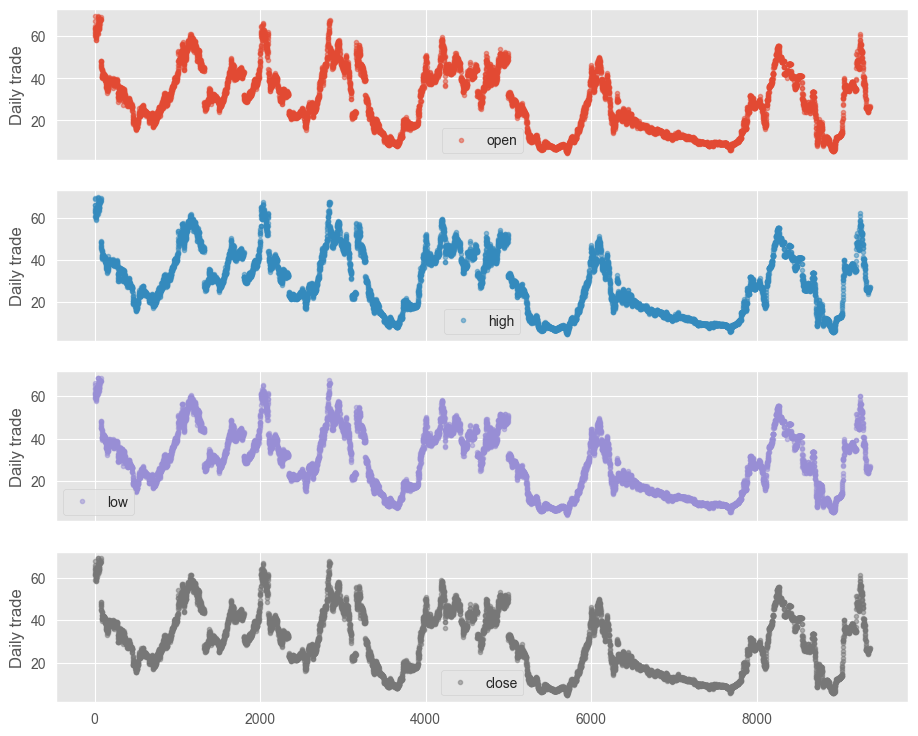

In [27]:
cols_plot = ['open', 'high', 'low','close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           date   open   high    low  close   volume symbol
0      1/4/2010  60.00  61.00  60.00  61.00   653120    HPG
1      1/5/2010  64.00  64.00  61.00  64.00  1203080    HPG
2      1/6/2010  63.50  66.00  63.00  66.00  1771660    HPG
3      1/7/2010  67.00  69.00  66.00  68.00  1535800    HPG
4      1/8/2010  69.50  69.50  65.00  65.00   909010    HPG
...         ...    ...    ...    ...    ...      ...    ...
9357  8/22/2022  26.50  26.50  26.20  26.35     1200    DTL
9358  8/23/2022  26.35  26.35  26.35  26.35      400    DTL
9359  8/24/2022  26.35  26.50  26.35  26.50      700    DTL
9360  8/25/2022  26.50  27.00  26.50  27.00      500    DTL
9361  8/26/2022  27.00  27.00  27.00  27.00      500    DTL

[9362 rows x 7 columns]


,count,mean,std,min,25%,50%,75%,max
open,9362.0,2.884858e+01,1.458722e+01,4.50,15.90,28.100,40.5,69.5
high,9362.0,2.920502e+01,1.475372e+01,4.80,16.00,28.450,41.0,70.0
low,9362.0,2.850091e+01,1.442307e+01,4.36,15.60,27.900,40.1,68.5
close,9362.0,2.884204e+01,1.458812e+01,4.55,15.85,28.125,40.6,69.0
volume,9362.0,3.158201e+06,6.510987e+06,0.00,10000.00,393875.000,3119210.0,77844000.0


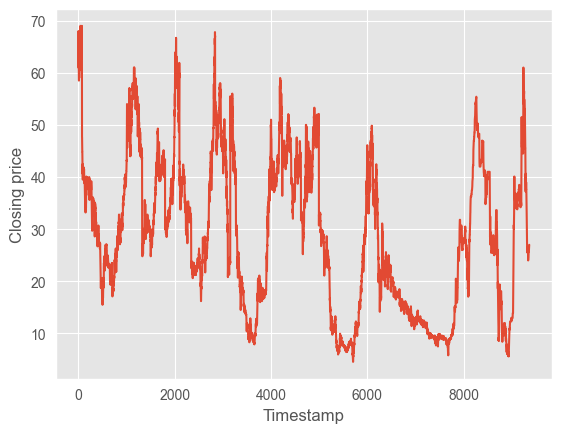

In [28]:
plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [29]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

7408
1852


In [30]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
186/186 [==============================] - 15s 24ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1183 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0788
Epoch 2/40
186/186 [==============================] - 3s 17ms/step - loss: 0.0196 - mse: 0.0196 - mae: 0.0882 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0736
Epoch 3/40
186/186 [==============================] - 3s 17ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0809 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.0979
Epoch 4/40
186/186 [==============================] - 3s 16ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0790 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0707
Epoch 5/40
186/186 [==============================] - 3s 17ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0786 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.0806
Epoch 6/40
186/186 [==============================] - 3s 17ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0758 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0655
Epoch 7/4

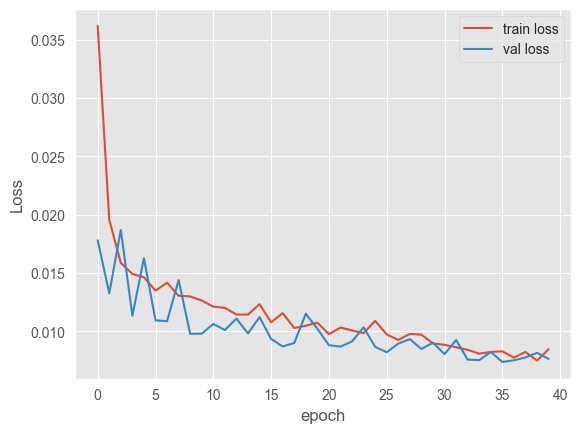

In [31]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

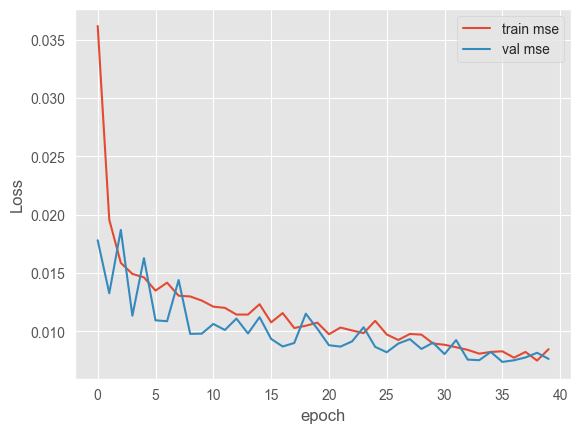

In [32]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

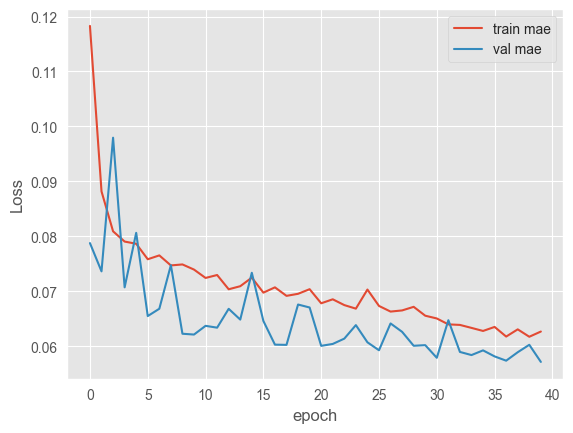

In [33]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [34]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 64)       

In [35]:
model.evaluate(test_X, test_Y)

58/58 [==============================] - 1s 10ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0571


[0.007619349751621485, 0.007619349751621485, 0.057146504521369934]

In [36]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.958361
R2 Score: 0.958361
Max Error: 0.984576


58/58 [==============================] - 1s 12ms/step


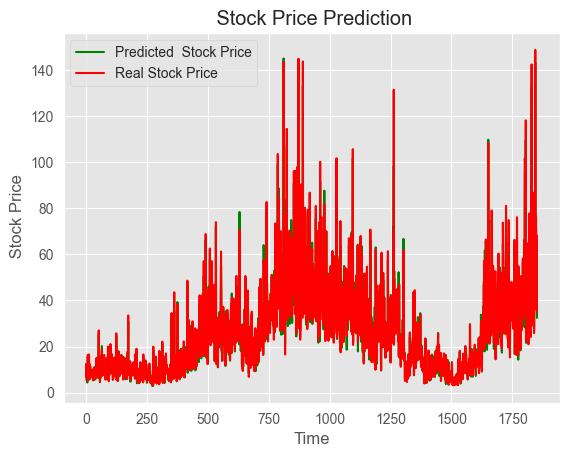

In [37]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [38]:
# First we need to save a model
model.save(r'C:\Users\Chi\Desktop\satellite\C\vn-steel-jsc-stock-prediction\model.h5')

In [39]:
# Load model
new_model = tf.keras.models.load_model(r'C:\Users\Chi\Desktop\satellite\C\vn-steel-jsc-stock-prediction\model.h5')

In [40]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_7 (TimeDis  (None, 1, 98, 64)        256       
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 21, 64)       